In [1]:
import xml.etree.ElementTree as ET
from pymongo import MongoClient 
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
from operator import itemgetter 

In [2]:
conn = MongoClient('localhost', 27017)
db = conn.database 
stopwords = set(STOPWORDS) 

In [ ]:
def xml_to_mongo(collection, filename):
    context = ET.iterparse(filename, events=("start", "end"))
    is_first = True

    for event, elem in context:
        if is_first:
            root = elem
            is_first = False
        if event == "end" and elem.tag == "row":
            collection.insert_one(elem.attrib)
            root.clear()

In [ ]:
collection = db.Badges
xml_to_mongo(collection, './stackoverflow.com/Badges.xml')
collection = db.Posts
xml_to_mongo(collection, './stackoverflow.com/Posts.xml')
collection = db.Tags
xml_to_mongo(collection, './stackoverflow.com/Tags.xml')
collection = db.Users
xml_to_mongo(collection, './stackoverflow.com/Users.xml')
collection = db.Votes
xml_to_mongo(collection, './stackoverflow.com/Votes.xml')

# Word Cloud

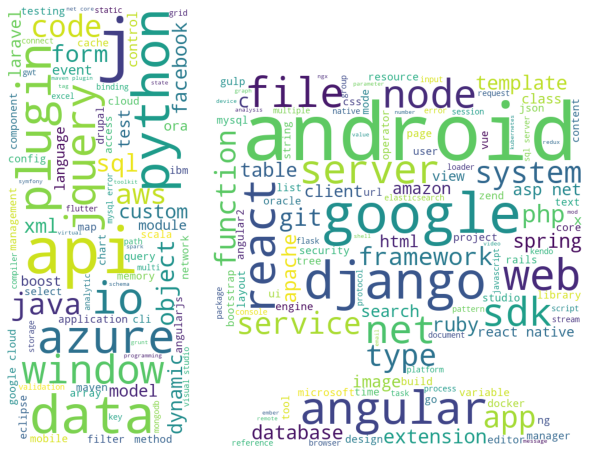

In [60]:
s = []
collection = db.Tags
cursor = collection.find() 
for record in cursor: 
    s.append(record['TagName'].replace(' ', '_').lower())

tags = ' '.join(s)

mask = np.array(Image.open('./computer.jpeg'))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10, mask=mask).generate(tags)   

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

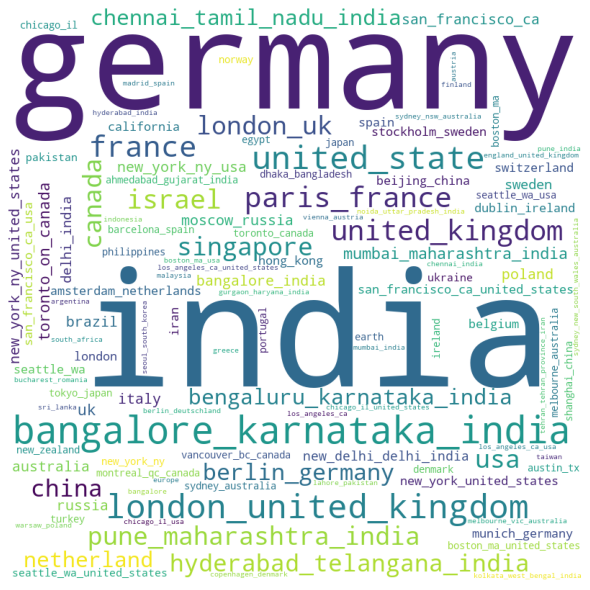

In [93]:
collection = db.Users
cursor = collection.find() 

locations = []
for record in cursor:
    try:
        location = record['Location'].lower()
        location = location.replace(',', '')
        location = location.replace(' ', '_')
        locations.append(location)
    except KeyError:
        pass
locations = ' '.join(locations)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(locations)   

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Tags Bar Plot

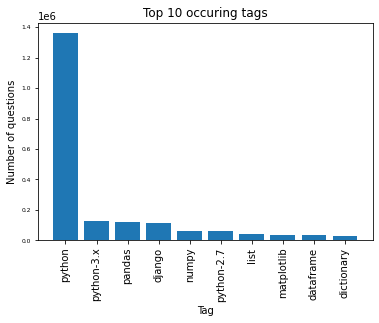

In [31]:
all_tags = {}
collection = db.Posts
cursor = collection.find() 
for record in cursor: 
    try:
        tags = record['Tags'].split('<')[1:]
        for elt in tags:
            if elt[:-1] in all_tags:
                all_tags[elt[:-1]] += 1
            else:
                all_tags[elt[:-1]] = 1
    except KeyError:
        pass
top_tags = dict(sorted(all_tags.items(), key = itemgetter(1), reverse = True)[:10])

plt.bar(range(len(top_tags)), list(top_tags.values()), align='center')
plt.xticks(range(len(top_tags)), list(top_tags.keys()), rotation=90)
plt.yticks(fontsize=6)
plt.title('Top 10 occuring tags')
plt.xlabel('Tag')
plt.ylabel('Number of questions')
plt.show()

In [ ]:
collection = db.Badges
cursor = collection.find() 
print('Badges', cursor[0].keys())

collection = db.Posts
cursor = collection.find() 
print('Posts', cursor[0].keys())

collection = db.Tags
cursor = collection.find() 
print('Tags', cursor[0].keys())

collection = db.Users
cursor = collection.find() 
print('Users', cursor[0].keys())

collection = db.Votes
cursor = collection.find() 
print('Votes', cursor[0].keys())

In [ ]:
collection = db.Badges
cursor = collection.find() 

TagBased = {'Yes': 0, 'No':0}
for record in cursor:
    if record['TagBased'] == 'False':
        TagBased['No'] += 1
    else:
        TagBased['Yes'] += 1
TagBased

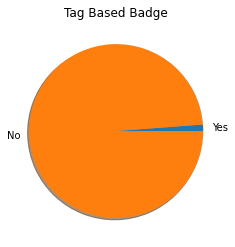

In [21]:
plt.pie(TagBased.values(), labels = TagBased.keys(), shadow=True)
plt.title('Tag Based Badge')
plt.show()

In [ ]:
collection = db.Badges
cursor = collection.find() 

years = {}
for record in cursor:
    date = record['Date'].split('-')
    if date[0] in years:
        years[date[0]] += 1
    else:
        years[date[0]] = 1

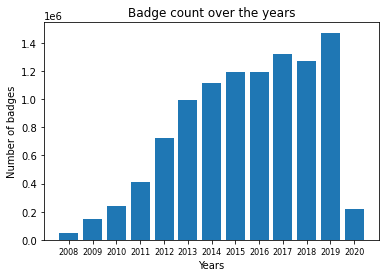

In [31]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Badge count over the years')
plt.xlabel('Years')
plt.ylabel('Number of badges')
plt.show()

In [38]:
collection = db.Badges
cursor = collection.find() 

badge_class = {}
for record in cursor:
    if record['Class'] in badge_class:
        badge_class[record['Class']] += 1
    else:
        badge_class[record['Class']] = 1

<StemContainer object of 3 artists>

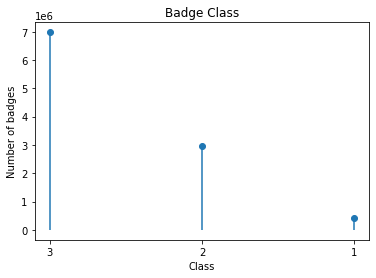

In [49]:
fig, ax = plt.subplots()
plt.title('Badge Class')
plt.xlabel('Class')
plt.ylabel('Number of badges')
ax.stem(badge_class.keys(), badge_class.values(), basefmt=' ')

In [ ]:
collection = db.Posts
cursor = collection.find() 

PostTypeId = {}
for record in cursor:
    if record['PostTypeId'] in PostTypeId:
        PostTypeId[record['PostTypeId']] += 1
    else:
        PostTypeId[record['PostTypeId']] = 1

<StemContainer object of 3 artists>

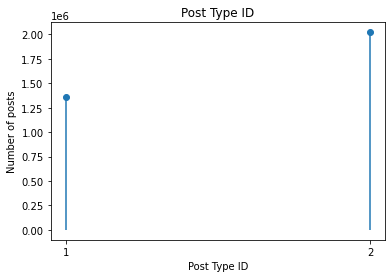

In [59]:
fig, ax = plt.subplots()
plt.title('Post Type ID')
plt.xlabel('Post Type ID')
plt.ylabel('Number of posts')
ax.stem(PostTypeId.keys(), PostTypeId.values(), basefmt=' ')

In [63]:
collection = db.Posts
cursor = collection.find() 

years = {}
for record in cursor:
    date = record['CreationDate'].split('-')
    if date[0] in years:
        years[date[0]] += 1
    else:
        years[date[0]] = 1

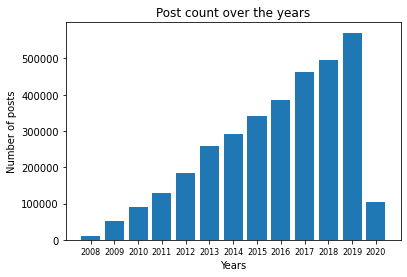

In [64]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Post count over the years')
plt.xlabel('Years')
plt.ylabel('Number of posts')
plt.show()

In [3]:
collection = db.Posts
cursor = collection.find()

scores = []
for record in cursor:
    scores.append(int(record['Score']))
    
print('Score max:', max(scores))
print('Score min:', min(scores))
print('Score mean:', np.mean(scores))
print('Score median:', np.median(scores))
print('Score std:', np.std(scores))

Score max: 14282
Score min: -64
Score mean: 3.039051931890217
Score median: 1.0
Score std: 30.273617518899467


(array([3.380382e+06, 1.570000e+02, 3.800000e+01, 1.500000e+01,
        7.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  -64. ,  1370.6,  2805.2,  4239.8,  5674.4,  7109. ,  8543.6,
         9978.2, 11412.8, 12847.4, 14282. ]),
 <BarContainer object of 10 artists>)

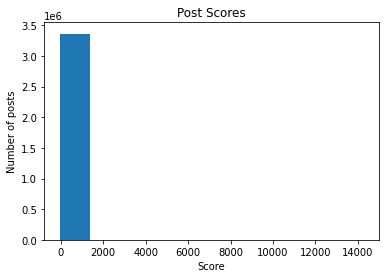

In [5]:
plt.title('Post Scores')
plt.xlabel('Score')
plt.ylabel('Number of posts')
plt.hist(scores, edgecolor='white')

(array([3.380382e+06, 1.570000e+02, 3.800000e+01, 1.500000e+01,
        7.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  -64. ,  1370.6,  2805.2,  4239.8,  5674.4,  7109. ,  8543.6,
         9978.2, 11412.8, 12847.4, 14282. ]),
 <BarContainer object of 10 artists>)

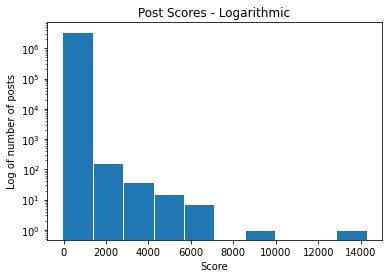

In [6]:
plt.title('Post Scores - Logarithmic')
plt.xlabel('Score')
plt.ylabel('Log of number of posts')
plt.hist(scores, log=True, edgecolor='white')

In [7]:
collection = db.Posts
cursor = collection.find()

ViewCount = []
for record in cursor:
    try:
        ViewCount.append(int(record['ViewCount']))
    except KeyError:
        pass
    
print('View Count max:', max(ViewCount))
print('View Count min:', min(ViewCount))
print('View Count mean:', np.mean(ViewCount))
print('View Count median:', np.median(ViewCount))
print('View Count std:', np.std(ViewCount))

View Count max: 4201239
View Count min: 2
View Count mean: 2625.5150854392655
View Count median: 214.0
View Count std: 27520.46974864079


(array([1.358146e+06, 4.870000e+02, 1.090000e+02, 5.800000e+01,
        2.100000e+01, 1.100000e+01, 1.100000e+01, 9.000000e+00,
        3.000000e+00, 5.000000e+00]),
 array([2.0000000e+00, 4.2012570e+05, 8.4024940e+05, 1.2603731e+06,
        1.6804968e+06, 2.1006205e+06, 2.5207442e+06, 2.9408679e+06,
        3.3609916e+06, 3.7811153e+06, 4.2012390e+06]),
 <BarContainer object of 10 artists>)

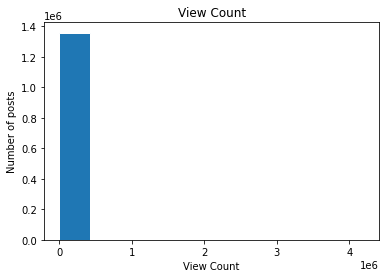

In [8]:
plt.title('View Count')
plt.xlabel('View Count')
plt.ylabel('Number of posts')
plt.hist(ViewCount, edgecolor='white')

(array([3.380382e+06, 1.570000e+02, 3.800000e+01, 1.500000e+01,
        7.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  -64. ,  1370.6,  2805.2,  4239.8,  5674.4,  7109. ,  8543.6,
         9978.2, 11412.8, 12847.4, 14282. ]),
 <BarContainer object of 10 artists>)

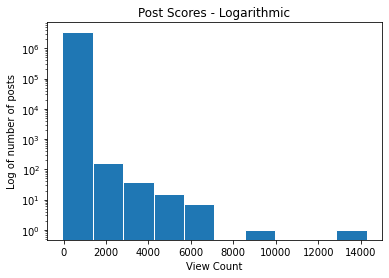

In [9]:
plt.title('Post Scores - Logarithmic')
plt.xlabel('View Count')
plt.ylabel('Log of number of posts')
plt.hist(scores, log=True, edgecolor='white')

In [83]:
collection = db.Posts
cursor = collection.find() 

years = {}
for record in cursor:
    try:
        date = record['LastEditDate'].split('-')
        if date[0] in years:
            years[date[0]] += 1
        else:
            years[date[0]] = 1
    except KeyError:
        pass

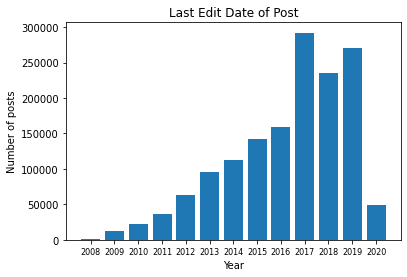

In [84]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Last Edit Date of Post')
plt.xlabel('Year')
plt.ylabel('Number of posts')
plt.show()

In [85]:
collection = db.Posts
cursor = collection.find() 

years = {}
for record in cursor:
    try:
        date = record['LastActivityDate'].split('-')
        if date[0] in years:
            years[date[0]] += 1
        else:
            years[date[0]] = 1
    except KeyError:
        pass

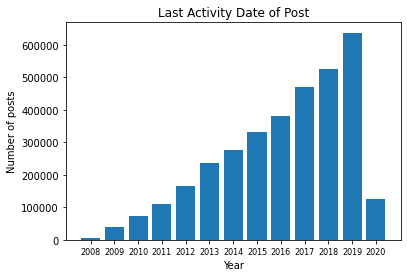

In [86]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Last Activity Date of Post')
plt.xlabel('Year')
plt.ylabel('Number of posts')
plt.show()

In [10]:
collection = db.Posts
cursor = collection.find()

AnswerCount = []
for record in cursor:
    try:
        AnswerCount.append(int(record['AnswerCount']))
    except KeyError:
        pass
    
print('Answer Count max:', max(AnswerCount))
print('Answer Count min:', min(AnswerCount))
print('Answer Count mean:', np.mean(AnswerCount))
print('Answer Count median:', np.median(AnswerCount))
print('Answer Count std:', np.std(AnswerCount))

Answer Count max: 191
Answer Count min: 0
Answer Count mean: 1.4878214091223525
Answer Count median: 1.0
Answer Count std: 1.3871784517513763


(array([1.358429e+06, 4.090000e+02, 1.800000e+01, 2.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

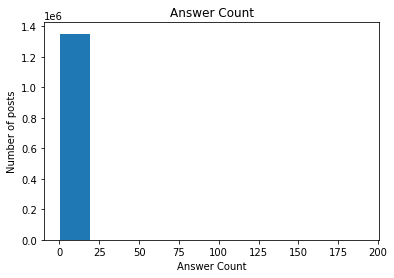

In [11]:
plt.title('Answer Count')
plt.xlabel('Answer Count')
plt.ylabel('Number of posts')
plt.hist(AnswerCount, edgecolor='white')

(array([1.358429e+06, 4.090000e+02, 1.800000e+01, 2.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

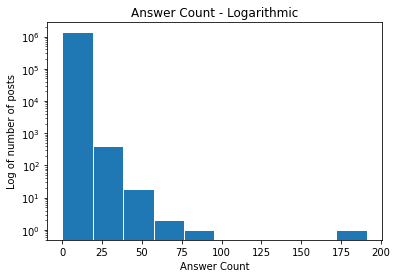

In [12]:
plt.title('Answer Count - Logarithmic')
plt.xlabel('Answer Count')
plt.ylabel('Log of number of posts')
plt.hist(AnswerCount, log=True, edgecolor='white')

In [13]:
collection = db.Posts
cursor = collection.find()

CommentCount = []
for record in cursor:
    CommentCount.append(int(record['CommentCount']))
    
print('Comment Count max:', max(AnswerCount))
print('Comment Count min:', min(AnswerCount))
print('Comment Count mean:', np.mean(AnswerCount))
print('Comment Count median:', np.median(AnswerCount))
print('Comment Count std:', np.std(AnswerCount))

Comment Count max: 191
Comment Count min: 0
Comment Count mean: 1.4878214091223525
Comment Count median: 1.0
Comment Count std: 1.3871784517513763


(array([3.231283e+06, 1.334230e+05, 1.349200e+04, 2.078000e+03,
        2.180000e+02, 6.900000e+01, 2.500000e+01, 6.000000e+00,
        5.000000e+00, 2.000000e+00]),
 array([ 0. ,  6.3, 12.6, 18.9, 25.2, 31.5, 37.8, 44.1, 50.4, 56.7, 63. ]),
 <BarContainer object of 10 artists>)

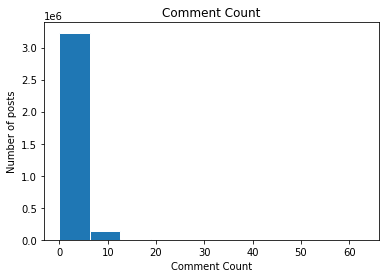

In [14]:
plt.title('Comment Count')
plt.xlabel('Comment Count')
plt.ylabel('Number of posts')
plt.hist(CommentCount, edgecolor='white')

(array([3.231283e+06, 1.334230e+05, 1.349200e+04, 2.078000e+03,
        2.180000e+02, 6.900000e+01, 2.500000e+01, 6.000000e+00,
        5.000000e+00, 2.000000e+00]),
 array([ 0. ,  6.3, 12.6, 18.9, 25.2, 31.5, 37.8, 44.1, 50.4, 56.7, 63. ]),
 <BarContainer object of 10 artists>)

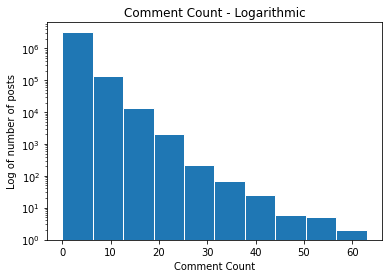

In [15]:
plt.title('Comment Count - Logarithmic')
plt.xlabel('Comment Count')
plt.ylabel('Log of number of posts')
plt.hist(CommentCount, log=True, edgecolor='white')

In [16]:
collection = db.Posts
cursor = collection.find()

FavoriteCount = []
for record in cursor:
    try:
        FavoriteCount.append(int(record['FavoriteCount']))
    except KeyError:
        pass
    
print('Favorite Count max:', max(FavoriteCount))
print('Favorite Count min:', min(FavoriteCount))
print('Favorite Count mean:', np.mean(FavoriteCount))
print('Favorite Count median:', np.median(FavoriteCount))
print('Favorite Count std:', np.std(FavoriteCount))

Favorite Count max: 5677
Favorite Count min: 0
Favorite Count mean: 3.0769022840924447
Favorite Count median: 1.0
Favorite Count std: 23.421391693820233


(array([3.1811e+05, 3.5000e+01, 5.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0. ,  567.7, 1135.4, 1703.1, 2270.8, 2838.5, 3406.2, 3973.9,
        4541.6, 5109.3, 5677. ]),
 <BarContainer object of 10 artists>)

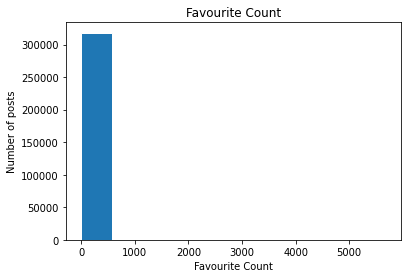

In [17]:
plt.title('Favourite Count')
plt.xlabel('Favourite Count')
plt.ylabel('Number of posts')
plt.hist(FavoriteCount, edgecolor='white')

(array([3.1811e+05, 3.5000e+01, 5.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0. ,  567.7, 1135.4, 1703.1, 2270.8, 2838.5, 3406.2, 3973.9,
        4541.6, 5109.3, 5677. ]),
 <BarContainer object of 10 artists>)

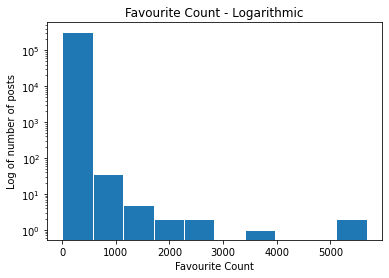

In [18]:
plt.title('Favourite Count - Logarithmic')
plt.xlabel('Favourite Count')
plt.ylabel('Log of number of posts')
plt.hist(FavoriteCount, log=True, edgecolor='white')

In [22]:
collection = db.Posts
cursor = collection.find() 

years = {}
closed = {'Yes': 0, 'No': 0}
for record in cursor:
    try:
        date = record['ClosedDate'].split('-')
        closed['Yes'] += 1
        if date[0] in years:
            years[date[0]] += 1
        else:
            years[date[0]] = 1
    except KeyError:
        closed['No'] += 1

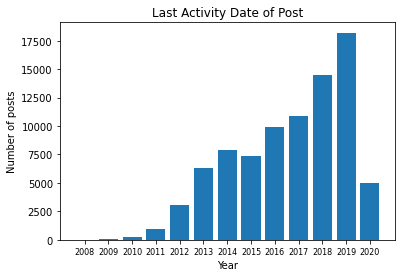

In [23]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Last Activity Date of Post')
plt.xlabel('Year')
plt.ylabel('Number of posts')
plt.show()

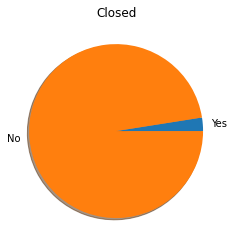

In [24]:
plt.pie(closed.values(), labels = closed.keys(), shadow=True)
plt.title('Closed')
plt.show()

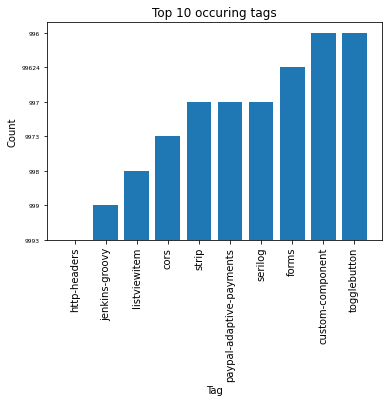

In [30]:
all_tags = {}
collection = db.Tags
cursor = collection.find() 
for record in cursor: 
        if record['TagName'].lower() in all_tags:
            all_tags[record['TagName'].lower()] += record['Count']
        else:
            all_tags[record['TagName'].lower()] = record['Count']

top_tags = dict(sorted(all_tags.items(), key = itemgetter(1), reverse = True)[:10])

plt.bar(range(len(top_tags)), list(top_tags.values()), align='center')
plt.xticks(range(len(top_tags)), list(top_tags.keys()), rotation=90)
plt.yticks(fontsize=6)
plt.title('Top 10 occuring tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

In [19]:
collection = db.Users
cursor = collection.find()

Reputation = []
for record in cursor:
    try:
        Reputation.append(int(record['Reputation']))
    except KeyError:
        pass
    
print('Reputation max:', max(Reputation))
print('Reputation min:', min(Reputation))
print('Reputation mean:', np.mean(Reputation))
print('Reputation median:', np.median(Reputation))
print('Reputation std:', np.std(Reputation))

Reputation max: 1166685
Reputation min: 1
Reputation mean: 1120.6608909672655
Reputation median: 43.0
Reputation std: 9534.229484611544


(array([6.69791e+05, 4.09000e+02, 1.10000e+02, 3.90000e+01, 2.00000e+01,
        1.30000e+01, 5.00000e+00, 7.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000000e+00, 1.1666940e+05, 2.3333780e+05, 3.5000620e+05,
        4.6667460e+05, 5.8334300e+05, 7.0001140e+05, 8.1667980e+05,
        9.3334820e+05, 1.0500166e+06, 1.1666850e+06]),
 <BarContainer object of 10 artists>)

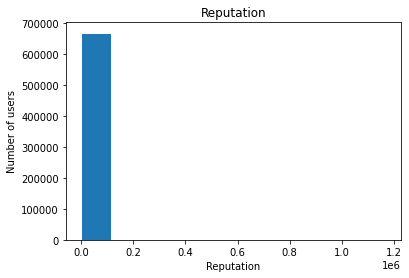

In [20]:
plt.title('Reputation')
plt.xlabel('Reputation')
plt.ylabel('Number of users')
plt.hist(Reputation, edgecolor='white')

(array([6.69791e+05, 4.09000e+02, 1.10000e+02, 3.90000e+01, 2.00000e+01,
        1.30000e+01, 5.00000e+00, 7.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000000e+00, 1.1666940e+05, 2.3333780e+05, 3.5000620e+05,
        4.6667460e+05, 5.8334300e+05, 7.0001140e+05, 8.1667980e+05,
        9.3334820e+05, 1.0500166e+06, 1.1666850e+06]),
 <BarContainer object of 10 artists>)

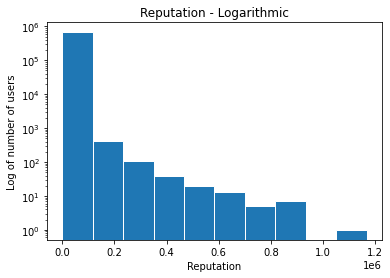

In [21]:
plt.title('Reputation - Logarithmic')
plt.xlabel('Reputation')
plt.ylabel('Log of number of users')
plt.hist(Reputation, log=True, edgecolor='white')

In [38]:
collection = db.Users
cursor = collection.find() 

years = {}
closed = {'Yes': 0, 'No': 0}
for record in cursor:
    try:
        date = record['CreationDate'].split('-')
        closed['Yes'] += 1
        if date[0] in years:
            years[date[0]] += 1
        else:
            years[date[0]] = 1
    except KeyError:
        closed['No'] += 1

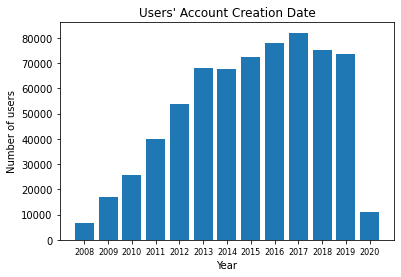

In [39]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Users\' Account Creation Date')
plt.xlabel('Year')
plt.ylabel('Number of users')
plt.show()

In [41]:
collection = db.Users
cursor = collection.find() 

years = {}
closed = {'Yes': 0, 'No': 0}
for record in cursor:
    try:
        date = record['LastAccessDate'].split('-')
        closed['Yes'] += 1
        if date[0] in years:
            years[date[0]] += 1
        else:
            years[date[0]] = 1
    except KeyError:
        closed['No'] += 1

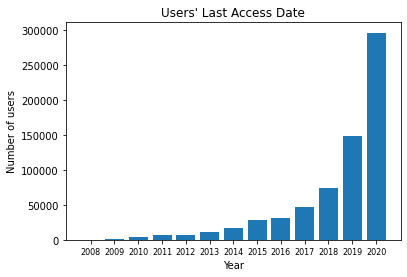

In [42]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Users\' Last Access Date')
plt.xlabel('Year')
plt.ylabel('Number of users')
plt.show()

In [22]:
collection = db.Users
cursor = collection.find()

Views = []
for record in cursor:
    Views.append(int(record['Views']))
    
print('Views max:', max(Views))
print('Views min:', min(Views))
print('Views mean:', np.mean(Views))
print('Views median:', np.median(Views))
print('Views std:', np.std(Views))

Views max: 1911062
Views min: 0
Views mean: 125.97803384571782
Views median: 9.0
Views std: 2936.224350173545


(array([6.70384e+05, 7.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0. ,  191106.2,  382212.4,  573318.6,  764424.8,  955531. ,
        1146637.2, 1337743.4, 1528849.6, 1719955.8, 1911062. ]),
 <BarContainer object of 10 artists>)

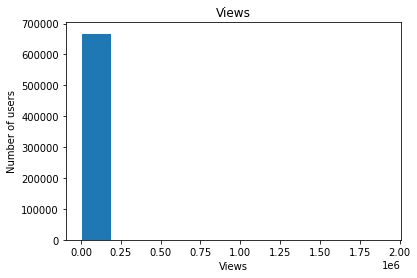

In [23]:
plt.title('Views')
plt.xlabel('Views')
plt.ylabel('Number of users')
plt.hist(Views, edgecolor='white')

(array([6.70384e+05, 7.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0. ,  191106.2,  382212.4,  573318.6,  764424.8,  955531. ,
        1146637.2, 1337743.4, 1528849.6, 1719955.8, 1911062. ]),
 <BarContainer object of 10 artists>)

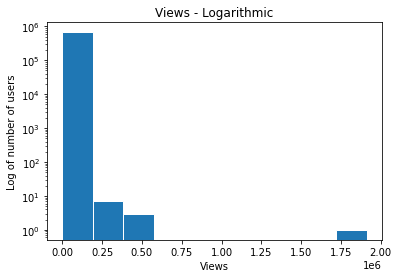

In [24]:
plt.title('Views - Logarithmic')
plt.xlabel('Views')
plt.ylabel('Log of number of users')
plt.hist(Views, log=True, edgecolor='white')

In [25]:
collection = db.Users
cursor = collection.find()

UpVotes = []
for record in cursor:
    UpVotes.append(int(record['UpVotes']))
    
print('UpVotes max:', max(UpVotes))
print('UpVotes min:', min(UpVotes))
print('UpVotes mean:', np.mean(UpVotes))
print('UpVotes median:', np.median(UpVotes))
print('UpVotes std:', np.std(UpVotes))

UpVotes max: 107429
UpVotes min: 0
UpVotes mean: 90.53410601212718
UpVotes median: 1.0
UpVotes std: 492.95591361035537


(array([6.70231e+05, 1.46000e+02, 1.00000e+01, 4.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  10742.9,  21485.8,  32228.7,  42971.6,  53714.5,
         64457.4,  75200.3,  85943.2,  96686.1, 107429. ]),
 <BarContainer object of 10 artists>)

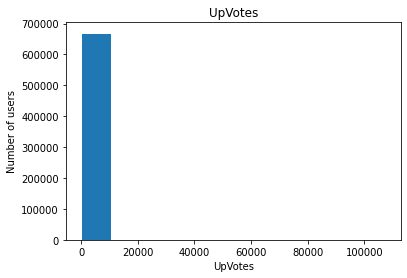

In [26]:
plt.title('UpVotes')
plt.xlabel('UpVotes')
plt.ylabel('Number of users')
plt.hist(UpVotes, edgecolor='white')

(array([6.70231e+05, 1.46000e+02, 1.00000e+01, 4.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  10742.9,  21485.8,  32228.7,  42971.6,  53714.5,
         64457.4,  75200.3,  85943.2,  96686.1, 107429. ]),
 <BarContainer object of 10 artists>)

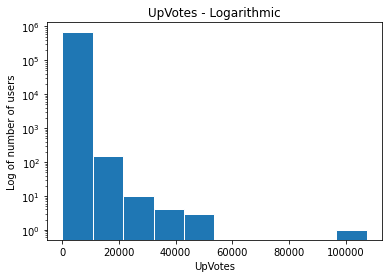

In [27]:
plt.title('UpVotes - Logarithmic')
plt.xlabel('UpVotes')
plt.ylabel('Log of number of users')
plt.hist(UpVotes, log=True, edgecolor='white')

In [28]:
collection = db.Users
cursor = collection.find()

DownVotes = []
for record in cursor:
    DownVotes.append(int(record['DownVotes']))
    
print('DownVotes max:', max(DownVotes))
print('DownVotes min:', min(DownVotes))
print('DownVotes mean:', np.mean(DownVotes))
print('DownVotes median:', np.median(DownVotes))
print('DownVotes std:', np.std(DownVotes))

DownVotes max: 80746
DownVotes min: 0
DownVotes mean: 15.228636848425182
DownVotes median: 0.0
DownVotes std: 397.3799940743436


(array([6.70223e+05, 1.02000e+02, 2.80000e+01, 2.00000e+01, 8.00000e+00,
        7.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([    0. ,  8074.6, 16149.2, 24223.8, 32298.4, 40373. , 48447.6,
        56522.2, 64596.8, 72671.4, 80746. ]),
 <BarContainer object of 10 artists>)

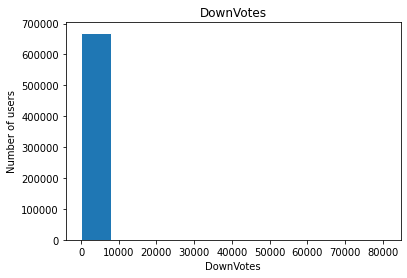

In [29]:
plt.title('DownVotes')
plt.xlabel('DownVotes')
plt.ylabel('Number of users')
plt.hist(DownVotes, edgecolor='white')

(array([6.70223e+05, 1.02000e+02, 2.80000e+01, 2.00000e+01, 8.00000e+00,
        7.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([    0. ,  8074.6, 16149.2, 24223.8, 32298.4, 40373. , 48447.6,
        56522.2, 64596.8, 72671.4, 80746. ]),
 <BarContainer object of 10 artists>)

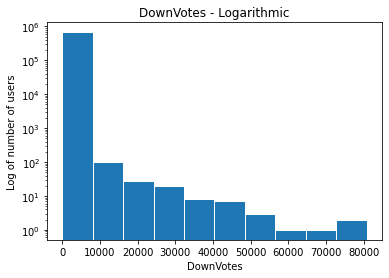

In [30]:
plt.title('DownVotes - Logarithmic')
plt.xlabel('DownVotes')
plt.ylabel('Log of number of users')
plt.hist(DownVotes, log=True, edgecolor='white')

In [ ]:
profile_image = {'Yes': 0, 'No': 0}
collection = db.Users
cursor = collection.find()

for record in cursor:
    try:
        if record['ProfileImageUrl']:
            profile_image['Yes'] += 1
    except KeyError:
        profile_image['No'] += 1
profile_image

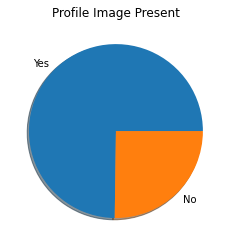

In [75]:
plt.pie(profile_image.values(), labels = profile_image.keys(), shadow=True)
plt.title('Profile Image Present')
plt.show()

In [82]:
collection = db.Votes
cursor = collection.find() 

VoteTypeId = {}
for record in cursor:
    try:
        if record['VoteTypeId'] in VoteTypeId:
            VoteTypeId[record['VoteTypeId']] += 1
        else:
            VoteTypeId[record['VoteTypeId']] = 1
    except KeyError:
        pass

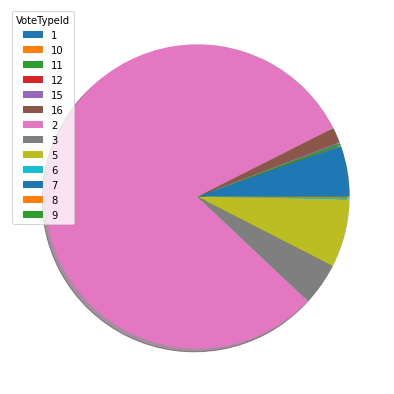

In [90]:
VoteTypeId = dict(sorted(VoteTypeId.items(), key = itemgetter(0)))

fig = plt.figure(figsize =(10, 7)) 
patches, texts = plt.pie(VoteTypeId.values(), shadow=True)
plt.legend(patches, VoteTypeId.keys(), loc='best', title='VoteTypeId')
plt.show()

In [84]:
collection = db.Votes
cursor = collection.find() 

years = {}
closed = {'Yes': 0, 'No': 0}
for record in cursor:
    try:
        date = record['CreationDate'].split('-')
        closed['Yes'] += 1
        if date[0] in years:
            years[date[0]] += 1
        else:
            years[date[0]] = 1
    except KeyError:
        closed['No'] += 1

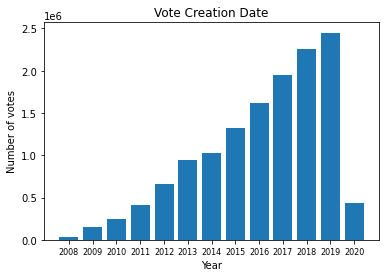

In [85]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()), fontsize=8)
plt.title('Vote Creation Date')
plt.xlabel('Year')
plt.ylabel('Number of votes')
plt.show()